In [8]:
import pandas as pd

In [9]:
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

True

In [10]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_early_model.json", "preds_labels_early_model.json")

In [11]:
df = pd.read_json("preds_labels_early_model.json")

In [12]:
df

,OocRG_9aT3g,OPzh8SUnu-4,p39rR4nLJV0,P8V_bx0L4RY,PBokg31iFAs,piyk0iI9E6Q,pPmllgDFQVI,Pw3_CyFFsXQ,q9bX7EkMvrA,qkRUcYHJ1JI,QtSMXXJq11Q,QuncAUHpl-8,qUUloBe5vEo,QxV2Uj17e8Y,RdNqmKrRmbU,rQWb_oYS1tg,rRsoSIJtKJs,RrxdB1VpYWo,S9KxqRUcnCU
preds,"[0.069912828505039, 0.069789849221706, 0.06972...","[0.072468347847461, 0.07265833765268301, 0.073...","[0.069892801344394, 0.06958120316267001, 0.070...","[0.07183126360177901, 0.070883706212043, 0.070...","[0.07165430486202201, 0.07155293226242, 0.0718...","[0.067494742572307, 0.066952683031558, 0.06730...","[0.069792218506336, 0.069671921432018, 0.06992...","[0.06807306408882101, 0.067225001752376, 0.068...","[0.071583040058612, 0.070052452385425, 0.07012...","[0.06911754608154201, 0.068706102669239, 0.068...","[0.070734523236751, 0.070925489068031, 0.07122...","[0.070542335510253, 0.07036817073822, 0.070827...","[0.070612363517284, 0.070515237748622, 0.06912...","[0.073903352022171, 0.073407635092735, 0.07449...","[0.070484831929206, 0.06977545469999301, 0.069...","[0.072019048035144, 0.07185581326484601, 0.072...","[0.068398110568523, 0.068046070635318, 0.06799...","[0.069161027669906, 0.06912935525178901, 0.069...","[0.069523878395557, 0.068571962416172, 0.06882..."
labels,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."


In [13]:
df.columns

Index(['OocRG_9aT3g', 'OPzh8SUnu-4', 'p39rR4nLJV0', 'P8V_bx0L4RY',
       'PBokg31iFAs', 'piyk0iI9E6Q', 'pPmllgDFQVI', 'Pw3_CyFFsXQ',
       'q9bX7EkMvrA', 'qkRUcYHJ1JI', 'QtSMXXJq11Q', 'QuncAUHpl-8',
       'qUUloBe5vEo', 'QxV2Uj17e8Y', 'RdNqmKrRmbU', 'rQWb_oYS1tg',
       'rRsoSIJtKJs', 'RrxdB1VpYWo', 'S9KxqRUcnCU'],
      dtype='object')

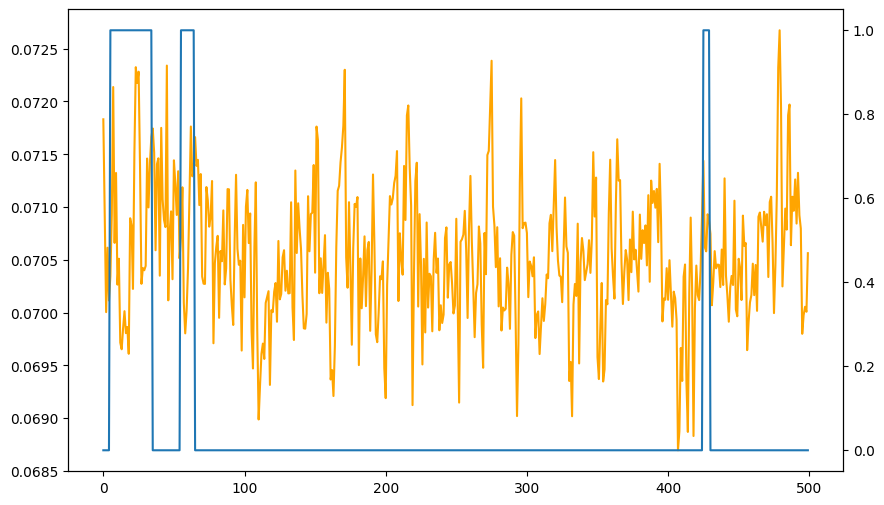

In [14]:
import matplotlib.pyplot as plt
vid_id = 'P8V_bx0L4RY'
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange')
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])
